In [12]:
from sklearn.manifold import MDS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [13]:
df = pd.read_csv("staedte.csv", header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9
0,0,45,17,44,42,32,31,27,25,11
1,45,0,34,14,12,21,35,37,25,39
2,17,34,0,30,18,5,4,22,9,7
3,44,14,30,0,1,15,24,43,38,41
4,42,12,18,1,0,2,13,40,28,33
5,32,21,5,15,2,0,10,29,16,19
6,31,35,4,24,13,10,0,36,23,20
7,27,37,22,43,40,29,36,0,3,8
8,25,25,9,38,28,16,23,3,0,6
9,11,39,7,41,33,19,20,8,6,0


In [14]:
mds = MDS(n_components=2, metric=False, verbose=True)
scaled_data = mds.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head(20)

breaking at iteration 32 with stress 0.11343430710268004
breaking at iteration 15 with stress 0.8094375361517441
breaking at iteration 5 with stress 1.5017509490672618
breaking at iteration 15 with stress 1.3491577497952072


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


,0,1
0,0.582273,-0.218223
1,-0.637290,0.037740
2,0.157860,0.080073
3,-0.617435,0.268828
4,-0.435640,0.276990
5,-0.175162,-0.088914
6,-0.049926,0.085754
7,0.395631,-0.334460
8,0.269800,-0.162650
9,0.541506,0.076424


In [15]:
mds.dissimilarity_matrix_

array([[ 0.        , 84.61678321, 56.79788728, 91.35644476, 91.39474821,
        76.15116545, 63.89053138, 45.59605246, 53.54437412, 38.47076812],
       [84.61678321,  0.        , 78.16648898, 29.93325909, 40.26164428,
        56.24055476, 64.29618962, 79.63039621, 74.30343195, 86.76404785],
       [56.79788728, 78.16648898,  0.        , 78.46018098, 63.63175308,
        34.68429039, 29.59729717, 58.02585631, 36.26292873, 34.0881211 ],
       [91.35644476, 29.93325909, 78.46018098,  0.        , 24.8394847 ,
        51.27377497, 57.6367938 , 93.56815698, 85.83122975, 94.39279634],
       [91.39474821, 40.26164428, 63.63175308, 24.8394847 ,  0.        ,
        32.        , 44.57577818, 91.31264973, 76.61592524, 86.22644606],
       [76.15116545, 56.24055476, 34.68429039, 51.27377497, 32.        ,
         0.        , 26.43860813, 73.79701891, 53.02829433, 61.39218191],
       [63.89053138, 64.29618962, 29.59729717, 57.6367938 , 44.57577818,
        26.43860813,  0.        , 70.22107946

In [16]:
scaled_data["city"] = ["Basel", "Berlin", "Frankfurt", "Hamburg", "Hannover", "Kassel", "Köln", "München", "Nürnberg", "Stuttgart"]
scaled_data.head(5)

,0,1,city
0,0.582273,-0.218223,Basel
1,-0.637290,0.037740,Berlin
2,0.157860,0.080073,Frankfurt
3,-0.617435,0.268828,Hamburg
4,-0.435640,0.276990,Hannover


[]

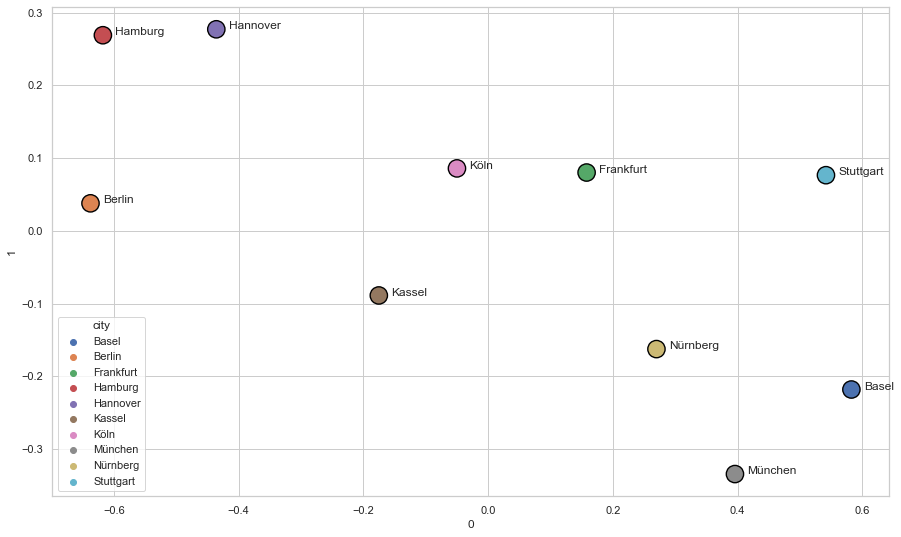

In [26]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x = scaled_data[0], y = scaled_data[1], hue = scaled_data["city"], s=300, edgecolor="black")
for i in range(len(scaled_data)):
    x_pos = scaled_data.iloc[i, 0]
    y_pos = scaled_data.iloc[i, 1]
    offset = 0.02
    plt.annotate(s=scaled_data.loc[i, "city"], xy = (x_pos + offset, y_pos))
plt.plot()